# Bivariate Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import kurtosis,skew

from matplotlib.colors import LinearSegmentedColormap

from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('Campus Placement.csv')
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
data.rename(columns={'specialisation':'mba_t'}, inplace=True)

1. salary has null values

In [4]:
data.fillna(0,inplace=True)

Filling them with zeros, which is acceptable technically and avoid NaN's

### gender with status(Placement status)
- Stacked Barplot

In [5]:
df = data.groupby(['gender', 'status']).size().reset_index().pivot(columns='gender', index='status', values=0)
df.reset_index(['status'],inplace=True)
df = df[['status','M','F']]
print(df)
print(' ')
df1 = data.groupby(['status', 'gender']).size().reset_index().pivot(columns='status', index='gender', values=0)
df1.reset_index(['gender'],inplace=True)
df1 = df1[['gender','Placed','Not Placed']]
print(df1)

gender      status    M   F
0       Not Placed   39  28
1           Placed  100  48
 
status gender  Placed  Not Placed
0           F      48          28
1           M     100          39


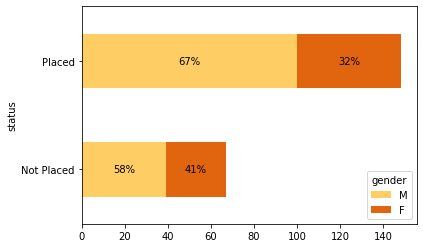

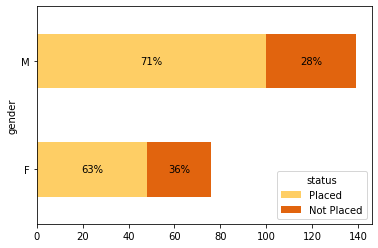

In [6]:
colors = sns.color_palette("YlOrBr", n_colors=len(df['status'].values))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

df.plot(x = 'status',kind='barh', stacked=True, mark_right = True, colormap = cmap1)
df_total = df["M"] + df["F"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(int(pc)) + '%', 
                 va = 'center', ha = 'center')
        
colors = sns.color_palette("YlOrBr", n_colors=len(df1['gender'].values))
cmap2 = LinearSegmentedColormap.from_list("my_colormap", colors)
        
df1.plot(x = 'gender',kind='barh', stacked=True, mark_right = True, colormap = cmap2)
df_total = df1["Placed"] + df1["Not Placed"]
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(int(pc)) + '%', 
                 va = 'center', ha = 'center')

#### First graph:

- Students who are not placed are only about half as much as the students who have placed
- Both the groups are almost in the same ratio. Male students are higher in number, both in placed and in not placed. For female's its vice-versa.

#### Second graph:

- Seeing the graph, we can infer that male students might have a slighter more possibility to get placed than the female students
- Male Students
    - 7/10 are getting placed. Whereas in 
- Female Students
    - only around 6/10 are getting placed        
    
However, it doesn't make much of any change.


> So, Finally, it can be inferred that, **Gender** might very slightly play a role in determining the status of placement

### ssc_p(10th percentage) with ssc_b(10th board) 
- Aggregation

Mean
ssc_b
Central    66.143879
Others     68.662020
Name: ssc_p, dtype: float64
 
Max
ssc_b
Central    88.0
Others     89.4
Name: ssc_p, dtype: float64
 
Min
ssc_b
Central    41.00
Others     40.89
Name: ssc_p, dtype: float64


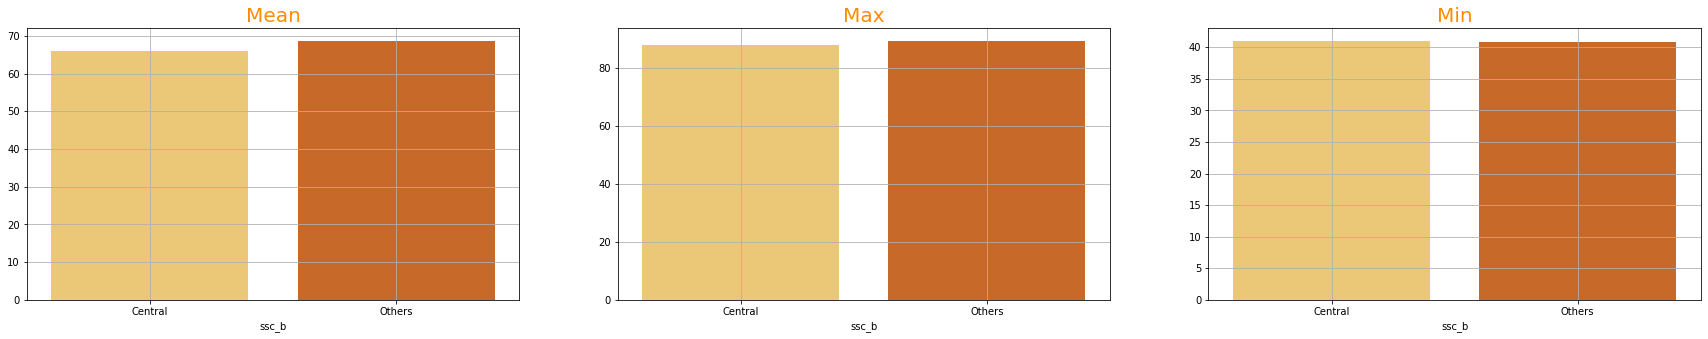

In [7]:
print('Mean')
print(data.groupby("ssc_b", sort=True)["ssc_p"].mean())
print(' ')
print('Max')
print(data.groupby("ssc_b", sort=True)["ssc_p"].max())
print(' ')
print('Min')
print(data.groupby("ssc_b", sort=True)["ssc_p"].min())

fig = plt.figure(figsize=(30,5))

ax = fig.add_subplot(1,3,1)
sns.barplot(x = data.groupby("ssc_b", sort=True)["ssc_p"].mean().index, y = data.groupby("ssc_b", sort=True)["ssc_p"].mean().values, palette='YlOrBr')
ax.set_title('Mean', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,2)
sns.barplot(x = data.groupby("ssc_b", sort=True)["ssc_p"].mean().index, y = data.groupby("ssc_b", sort=True)["ssc_p"].max().values, palette='YlOrBr')
ax.set_title('Max', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,3)
sns.barplot(x = data.groupby("ssc_b", sort=True)["ssc_p"].mean().index, y = data.groupby("ssc_b", sort=True)["ssc_p"].min().values, palette='YlOrBr')
ax.set_title('Min', color = 'darkorange', fontsize = 20)
plt.grid()

plt.show()

Every aggregation result seem to be equal with each other
- This tells, that the board of exam **need not be considered** while seeing the percentage
    > Which means, the score of 80% in Central board almost has the same value as the score of 80% in Other boards

### ssc_p(10th percentage) with ssc_b(10th board) 
- Distplot

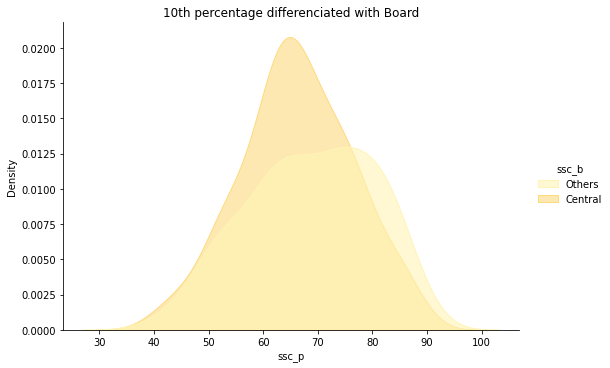

In [8]:
sns.displot(data=data, x='ssc_p', hue='ssc_b', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:2], height=5, aspect=1.5, alpha = 0.6).set(title = '10th percentage differenciated with Board')

The graph of **Central board** seem to be normal because, 
- It's symmetric.
- centered with the number line.
- seem to have a bell curve without any skewedness.

However, the kurtosis is slightly high.
 
But, the graph of **Other board** has a less kurtosis and slight skewed towards the right side and kind of **has double peak**.
- *Let's check them*

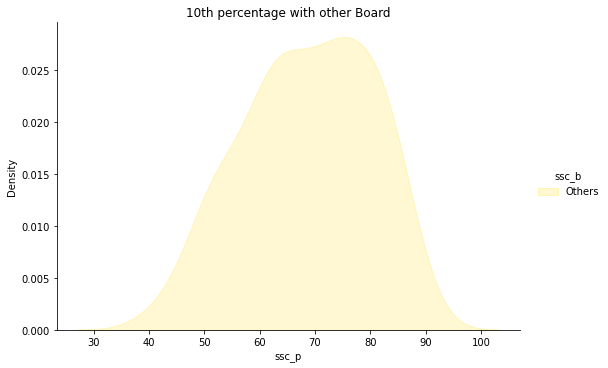

In [9]:
df = data[data['ssc_b'] == 'Others']
sns.displot(data=df, x='ssc_p', hue='ssc_b', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:1], height=5, aspect=1.5, alpha = 0.6).set(title = '10th percentage with other Board')

We have taken the distribution of 10th percentage for only other board students.
- It sort of has a double peak.       

Now, let's try this distribution with any other categories, which defines the variable well

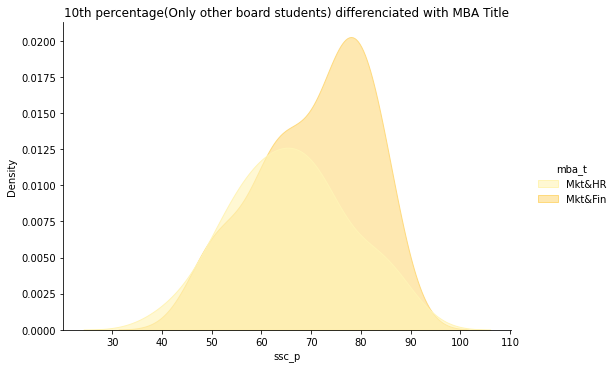

In [10]:
df = data[data['ssc_b'] == 'Others']
sns.displot(data=df, x='ssc_p', hue='mba_t', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:2], height=5, aspect=1.5, alpha = 0.6).set(title = '10th percentage(Only other board students) differenciated with MBA Title')

Well, finally after more trail and errors, we figured out that the variable ```mba_t(MBA Title)``` well defines the percentage score of 10th(ssc_p).     

- From the graph its well understood that,        

> Students who have **scored good in thier 10th, are most likely to be in Mkt&Fin** group in MBA. Whereas, Those who scored around the average score, would most likley take Mkt&HR in their MBA.      


> Which means, Mkt&Fin might have been considered to be the most valued group to get placed.

### ssc_p(10th percentage) with ssc_b(10th board) 
- Boxplot

Text(0.5, 1.0, 'Boxplot for ssc_p vs ssc_b')

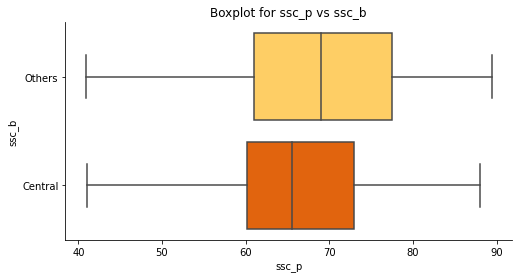

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
sns.boxplot(x = data['ssc_p'],y = data['ssc_b'], palette='YlOrBr', saturation=1, orient = 'h')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplot for ssc_p vs ssc_b')

### hsc_p(12th percentage) with hsc_b(12th board) and hsc_s(12th branch)
- Anova*

hsc_p > groupby with hsc_b(varience)    

hsc_p > groupby with hsc_s(varience)    

- compare varience with hsc_p

In [12]:
data.groupby("hsc_b", sort=True)["hsc_p"].var()

hsc_b
Central     88.946070
Others     138.626815
Name: hsc_p, dtype: float64

In [13]:
data.groupby("hsc_s", sort=True)["hsc_p"].var()

hsc_s
Arts        152.848727
Commerce    119.356831
Science      97.993857
Name: hsc_p, dtype: float64

In [14]:
data.hsc_p.var()

118.75570583786133

- *A simple approach could be to group the continuous variable using the categorical variable, measure the variance in each group and comparing it to the overall variance of the continuous variable.*
    - *If the variance after grouping falls down significantly, it means that the categorical variable can explain most of the variance of the continuous variable and so the two variables likely have a strong association.* 
    - *If the variables have no correlation, then the variance in the groups is expected to be similar to the original variance.*

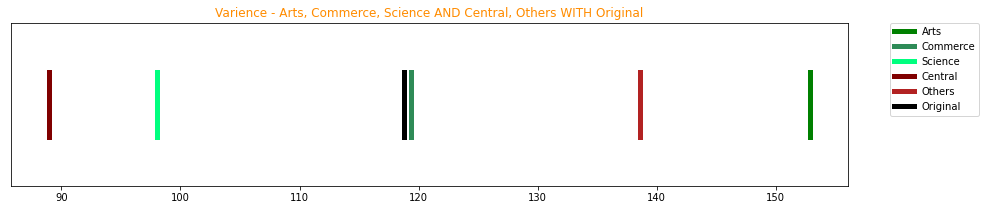

In [15]:
plt.figure(figsize=(15, 3))
plt.yticks([])
plt.title("Varience - Arts, Commerce, Science AND Central, Others WITH Original", color = 'darkorange')

plt.axvline(x=152.84, ymin=0.3, ymax=0.7, ls='solid', color='green', label='Arts',linewidth = 5.0)
plt.axvline(x=119.35, ymin=0.3, ymax=0.7, ls='solid', color='seagreen', label='Commerce',linewidth = 5.0)
plt.axvline(x=97.99, ymin=0.3, ymax=0.7, ls='solid', color='springgreen', label='Science',linewidth = 5.0)

plt.axvline(x=88.94, ymin=0.3, ymax=0.7, ls='solid', color='maroon', label='Central',linewidth = 5.0)
plt.axvline(x=138.62, ymin=0.3, ymax=0.7, ls='solid', color='firebrick', label='Others',linewidth = 5.0)

plt.axvline(x=118.75, ymin=0.3, ymax=0.7, ls='solid', color='black', label='Original',linewidth = 5.0)

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.show()

- Seeing the above number line, every group has a considerable difference. Especially,
    - **Central in hsc_b** and 
    - **Arts in hsc_s** seem to have a large difference in varience when compared to others       

> So, As a whole, both the varibles(hsc_b and hsc_s) explains the varience in hsc_p, which indicates the strong association between them. 

### hsc_p(12th percentage) with hsc_b(12th board) 
- Aggregation

Mean
hsc_b
Central    66.598571
Others     66.162977
Name: hsc_p, dtype: float64
 
Max
hsc_b
Central    87.0
Others     97.7
Name: hsc_p, dtype: float64
 
Min
hsc_b
Central    39.0
Others     37.0
Name: hsc_p, dtype: float64


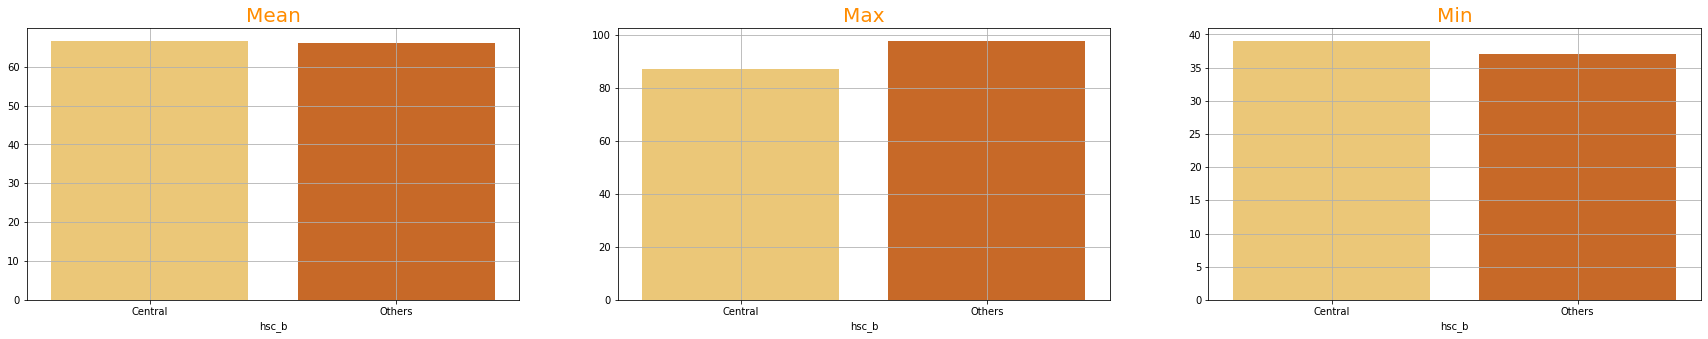

In [16]:
print('Mean')
print(data.groupby("hsc_b", sort=True)["hsc_p"].mean())
print(' ')
print('Max')
print(data.groupby("hsc_b", sort=True)["hsc_p"].max())
print(' ')
print('Min')
print(data.groupby("hsc_b", sort=True)["hsc_p"].min())

fig = plt.figure(figsize=(30,5))

ax = fig.add_subplot(1,3,1)
sns.barplot(x = data.groupby("hsc_b", sort=True)["hsc_p"].mean().index, y = data.groupby("hsc_b", sort=True)["hsc_p"].mean().values, palette='YlOrBr')
ax.set_title('Mean', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,2)
sns.barplot(x = data.groupby("hsc_b", sort=True)["hsc_p"].mean().index, y = data.groupby("hsc_b", sort=True)["hsc_p"].max().values, palette='YlOrBr')
ax.set_title('Max', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,3)
sns.barplot(x = data.groupby("hsc_b", sort=True)["hsc_p"].mean().index, y = data.groupby("hsc_b", sort=True)["hsc_p"].min().values, palette='YlOrBr')
ax.set_title('Min', color = 'darkorange', fontsize = 20)
plt.grid()

plt.show()

**12th Percentage**
- The mean is almost the same for the percentage in bothe groups
- Coming to Max and Min, 
    - Min is almost the same but, Max of central board is slightly lower than the max of Other board
    - which indicates the difficulty level of board that the students have faced       
    
> As a conclusion, 
> - Students percentage scores of central board to be valued a bit more than the percentage scores of Other boards.       
> - **80% in central board is not same as 80% in Other boards**

### hsc_p(12th percentage) with hsc_s(12th branch) 
- Aggregation

Mean
hsc_s
Arts        62.745455
Commerce    68.999115
Science     63.456374
Name: hsc_p, dtype: float64
 
Max
hsc_s
Arts        86.0
Commerce    97.0
Science     97.7
Name: hsc_p, dtype: float64
 
Min
hsc_s
Arts        37.0
Commerce    44.0
Science     39.0
Name: hsc_p, dtype: float64


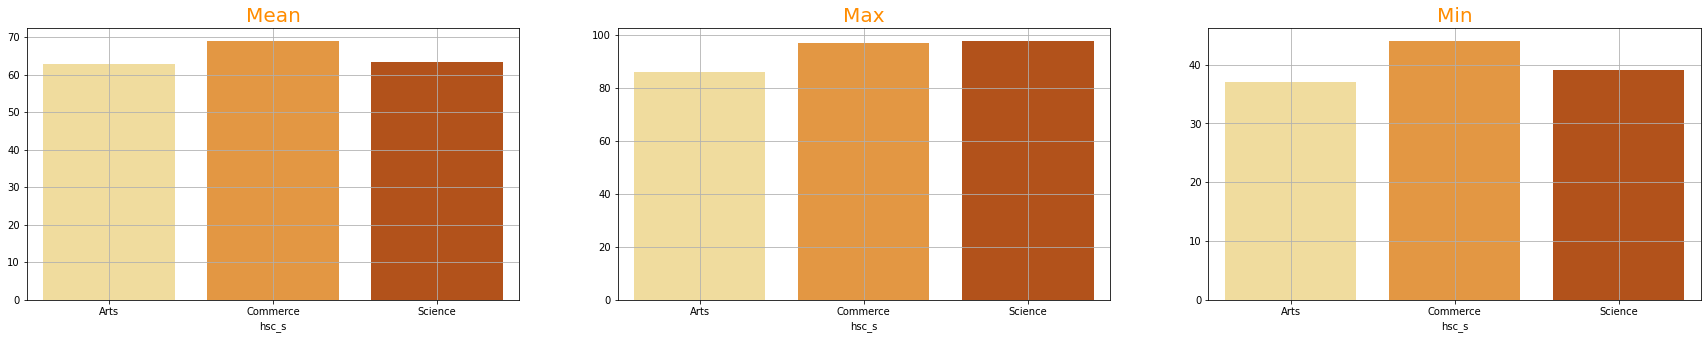

In [17]:
print('Mean')
print(data.groupby("hsc_s", sort=True)["hsc_p"].mean())
print(' ')
print('Max')
print(data.groupby("hsc_s", sort=True)["hsc_p"].max())
print(' ')
print('Min')
print(data.groupby("hsc_s", sort=True)["hsc_p"].min())

fig = plt.figure(figsize=(30,5))

ax = fig.add_subplot(1,3,1)
sns.barplot(x = data.groupby("hsc_s", sort=True)["hsc_p"].mean().index, y = data.groupby("hsc_s", sort=True)["hsc_p"].mean().values, palette='YlOrBr')
ax.set_title('Mean', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,2)
sns.barplot(x = data.groupby("hsc_s", sort=True)["hsc_p"].mean().index, y = data.groupby("hsc_s", sort=True)["hsc_p"].max().values, palette='YlOrBr')
ax.set_title('Max', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,3)
sns.barplot(x = data.groupby("hsc_s", sort=True)["hsc_p"].mean().index, y = data.groupby("hsc_s", sort=True)["hsc_p"].min().values, palette='YlOrBr')
ax.set_title('Min', color = 'darkorange', fontsize = 20)
plt.grid()

plt.show()

**12th Percentage**
- The average of **Commerce** group is comparitively higher, which indicates either, the subject is easier thsn the others or students are comparitively brillient than arts and science groups
- Comparing the Max and Min scores of commerce group, both Min and Max are at the highest possible scores, which again tells the same inference as above
<br><br/>
- Seeing  all aggregations of Arts group, we can say that, either the subject is tougher or every students are not brillient
- Seeing  all aggregations of Science group, we can't infer anything specifically

As a conclusion, we can say that, 

> All aggregations of **Commerce** group are considerably higher than the other groups. 12th scores of commerce group is higher.

### hsc_p(12th percentage) with hsc_b(12th board) 
- Distplot

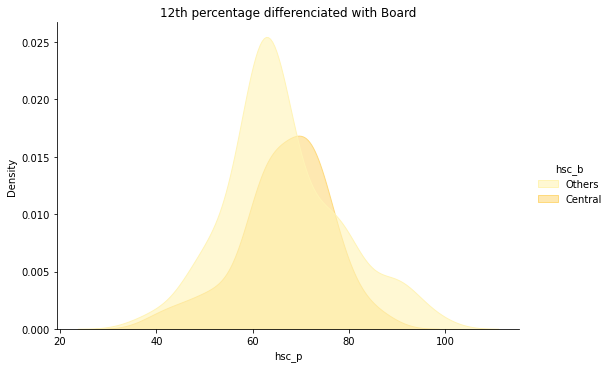

In [18]:
sns.displot(data=data, x='hsc_p', hue='hsc_b', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:2], height=5, aspect=1.5, alpha = 0.6).set(title = '12th percentage differenciated with Board')

This graph is eventually the result for the question we had earlier, that is, the reason for the spike in the distribution of 12th percentage scores
- That **spike** is due to the population of students in **Other Board**, where most of the students lie in a specific score zone and not dispersed as the student scores in central board. Which tells us,

> The grouped scoring of Other board students in a specific percentage zone is responsible for the overall spike in the original distribution graph.

### hsc_p(12th percentage) with hsc_s(12th branch) 
- Distplot

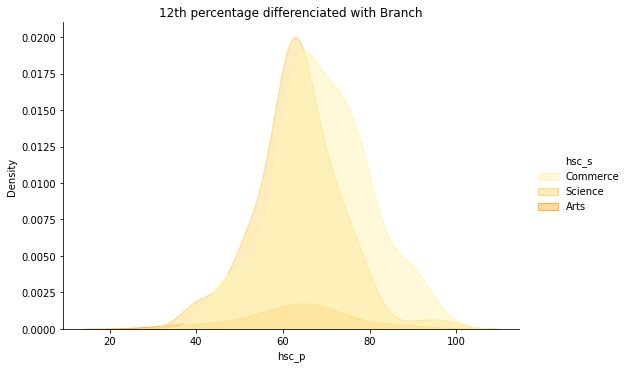

In [19]:
sns.displot(data=data, x='hsc_p', hue='hsc_s', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:3], height=5, aspect=1.5, alpha = 0.5).set(title = '12th percentage differenciated with Branch')

- First of all, the Population and the scoring pattern are almost same in both **Commerce** and **Science** group
- Secondly, in **Arts** group, the population is very less when compared to other groups. However, the distibution covers the whole number line.
- Specifically in the graph of Science group, we can see that the graph tends to end with around the score of 90 but, it prolongs flatly beyond 100, which might indicate that, 
    - There might be a few extraordinary students in the Science group *or*
    - Those might be outliers, which may have been entered by mistake.
<br><br/>
Let's check them anyways.

In [20]:
d1 = data[data['hsc_s'] == 'Science']
d1[d1['hsc_p']>80]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
24,M,76.5,Others,97.7,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
78,M,84.0,Others,90.9,Others,Science,64.50,Sci&Tech,No,86.04,Mkt&Fin,59.42,Placed,270000.0


These two records seem to be a outlier because, there are no records after 80 and wehave 90 and 97 after that.        
> So, either those students might be extraordinary or it might be an error.

### hsc_b(12th board) with hsc_s(12th branch) 
-  Stacked Barplot

In [21]:
df = data.groupby(['hsc_s', 'hsc_b']).size().reset_index().pivot(columns='hsc_s', index='hsc_b', values=0)
df.reset_index(['hsc_b'],inplace=True)
df = df[['hsc_b','Commerce','Science','Arts']]
print(df)
print(' ')
df1 = data.groupby(['hsc_b', 'hsc_s']).size().reset_index().pivot(columns='hsc_b', index='hsc_s', values=0)
df1.reset_index(['hsc_s'],inplace=True)
df1 = df1[['hsc_s','Central','Others']]
print(df1)


hsc_s    hsc_b  Commerce  Science  Arts
0      Central        48       29     7
1       Others        65       62     4
 
hsc_b     hsc_s  Central  Others
0          Arts        7       4
1      Commerce       48      65
2       Science       29      62


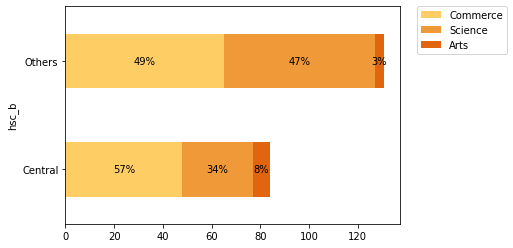

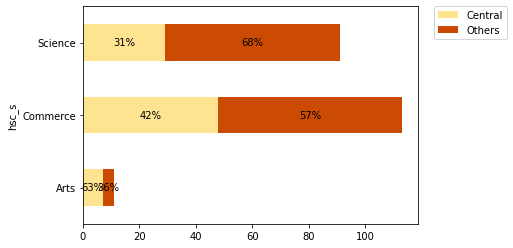

In [22]:
colors = sns.color_palette("YlOrBr", n_colors=len(df['hsc_b'].values))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)


df.plot(x = 'hsc_b',kind='barh', stacked=True, mark_right = True, colormap = cmap1)
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
df_total = df["Commerce"] + df["Arts"] + df["Science"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(int(pc)) + '%', 
                 va = 'center', ha = 'center')
        
colors = sns.color_palette("YlOrBr", n_colors=len(df1['hsc_s'].values))
cmap2 = LinearSegmentedColormap.from_list("my_colormap", colors)        
        

df1.plot(x = 'hsc_s',kind='barh', stacked=True, mark_right = True, colormap = cmap2)
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
df_total = df1["Central"] + df1["Others"]
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(int(pc)) + '%', 
                 va = 'center', ha = 'center')

#### First graph:

- **Commerce is dominating** both Science and Arts with the ```count```
- count of Other board students are higher than the count of Central board students

### hsc_p(12th percentage) with hsc_b(12th board) 
- Boxplot

Text(0.5, 1.0, 'Boxplot for hsc_p vs hsc_b')

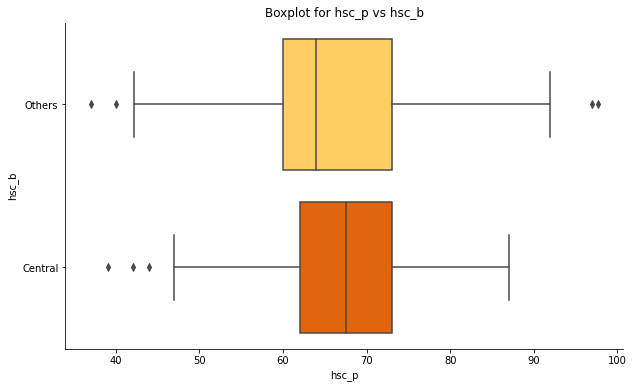

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = data['hsc_p'],y = data['hsc_b'], palette='YlOrBr', saturation=1, orient = 'h')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplot for hsc_p vs hsc_b')

### hsc_p(12th percentage) with hsc_s(12th branch) 
- Boxplot

Text(0.5, 1.0, 'Boxplot for hsc_p vs hsc_s')

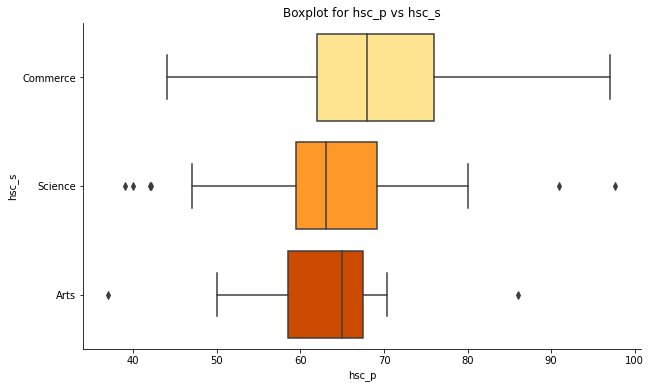

In [24]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = data['hsc_p'],y = data['hsc_s'], palette='YlOrBr', saturation=1, orient = 'h')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplot for hsc_p vs hsc_s')

### hsc_p(12th percentage) with ssc_p(10th percentage) 
- Scatterplot

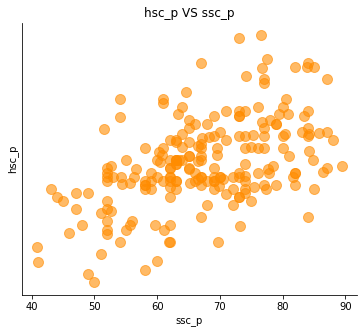

In [25]:
fig, ax = plt.subplots(figsize = (6,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.plot('ssc_p', 'hsc_p',data = data,color = 'darkorange',
        marker='o', linestyle='none', markersize=10, alpha=0.6)

# Label
ax.set_yticks([])
ax.grid(False)
ax.set(title='hsc_p VS ssc_p',
       xlabel='ssc_p', 
       ylabel='hsc_p')
plt.show();

- The plot is scattered all over evenly except, the middle region.
    - This central cluster also, justifies the peak in the original distribution graph.    

> The plot tends to give a **+ve correlation with a minimum magnitude**.

### degree_p(UnderGraduate degree percentage) with degree_t(UnderGraduate degree title)
- Aggregation

Mean
degree_t
Comm&Mgmt    66.203103
Others       60.666364
Sci&Tech     67.844237
Name: degree_p, dtype: float64
 
Max
degree_t
Comm&Mgmt    85.0
Others       78.0
Sci&Tech     91.0
Name: degree_p, dtype: float64
 
Min
degree_t
Comm&Mgmt    50.0
Others       52.0
Sci&Tech     52.0
Name: degree_p, dtype: float64


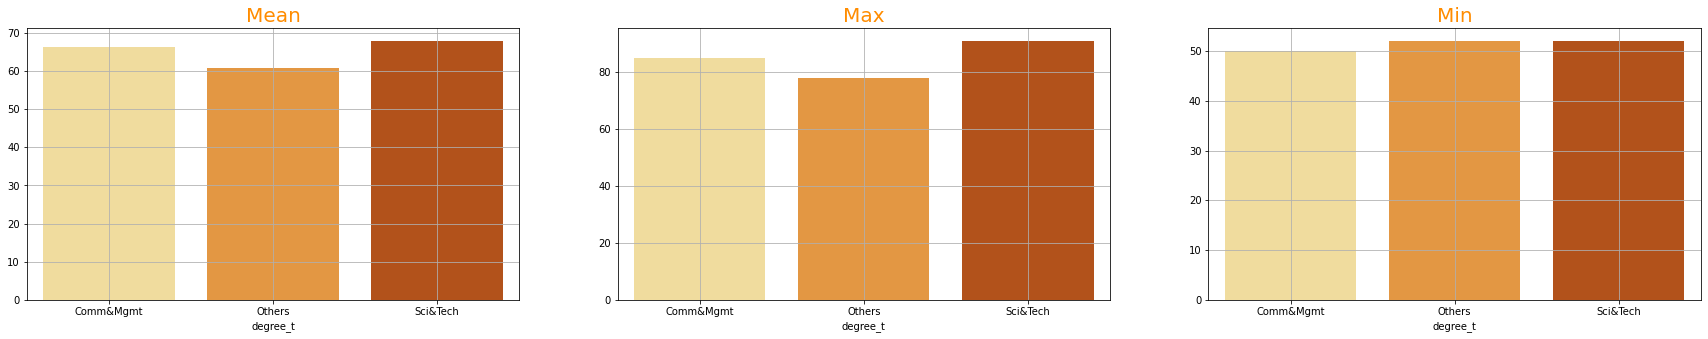

In [26]:
print('Mean')
print(data.groupby("degree_t", sort=True)["degree_p"].mean())
print(' ')
print('Max')
print(data.groupby("degree_t", sort=True)["degree_p"].max())
print(' ')
print('Min')
print(data.groupby("degree_t", sort=True)["degree_p"].min())

fig = plt.figure(figsize=(30,5))

ax = fig.add_subplot(1,3,1)
sns.barplot(x = data.groupby("degree_t", sort=True)["degree_p"].mean().index, y = data.groupby("degree_t", sort=True)["degree_p"].mean().values, palette='YlOrBr')
ax.set_title('Mean', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,2)
sns.barplot(x = data.groupby("degree_t", sort=True)["degree_p"].mean().index, y = data.groupby("degree_t", sort=True)["degree_p"].max().values, palette='YlOrBr')
ax.set_title('Max', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,3)
sns.barplot(x = data.groupby("degree_t", sort=True)["degree_p"].mean().index, y = data.groupby("degree_t", sort=True)["degree_p"].min().values, palette='YlOrBr')
ax.set_title('Min', color = 'darkorange', fontsize = 20)
plt.grid()

plt.show()

Every bar in each graph are more or less in the same level. So, drawing a defined result is not possible here.

### degree_p(UnderGraduate degree percentage) with degree_t(UnderGraduate degree title)
- Distplot

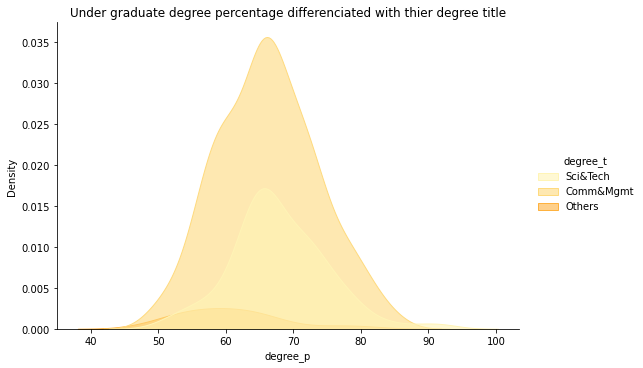

In [27]:
sns.displot(data=data, x='degree_p', hue='degree_t', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:3], height=5, aspect=1.5, alpha = 0.6).set(title = 'Under graduate degree percentage differenciated with thier degree title')

By differenciating the distribution graph with respect tot their degree tilte, we obtain answers to unanswered questions that we had while performing univariate analysis. They are
- First, we need to know the exact reason for the **spike** that is depicted in the graph
- Second, The **minor bump both before and after the peak** in the original distribution graph are to be defined.     

The commere group, is already leading by count and on top of it, it give a steap curve around 60% to 70%. Also, the science group has shown a good rise around the same numbers(60% to 70%), Which is the ultimate reason for the peak.

Now, we need to know the origin of the bumps occured in both left and right side of the peak. Well, it is depicted clearly that, **the left bumps are caused by commerce students and the right ones are caused by science students.**
- In simpler words, many students of commerce group scored below the peak, whereas, many science students have scored above the peak
    - Which gives the reason for, **how science students are getting placed**, score good in entrance test, get good score in mba, despite the fact that none of these are thier domain specific. 

### degree_p(UnderGraduate degree percentage) with degree_t(UnderGraduate degree title)
- Boxplot

Text(0.5, 1.0, 'Boxplot for degree_p vs degree_t')

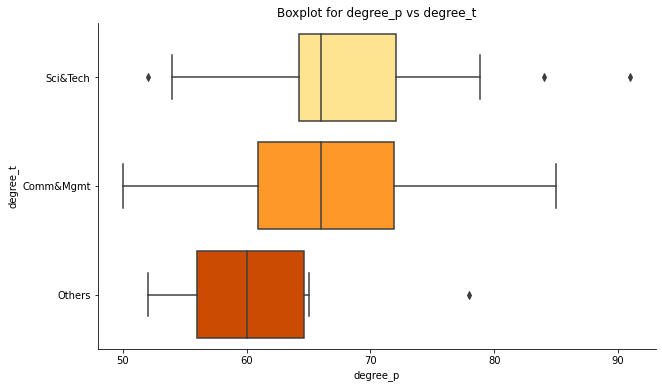

In [28]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = data['degree_p'],y = data['degree_t'], palette='YlOrBr', saturation=1, orient = 'h')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplot for degree_p vs degree_t')

### workex(Work Expereince) with status(placement status)
- Stacked Barplot

In [29]:
df = data.groupby(['workex', 'status']).size().reset_index().pivot(columns='workex', index='status', values=0)
df.reset_index(['status'],inplace=True)
df = df[['status','Yes','No']]
print(df)
print(' ')
df1 = data.groupby(['status', 'workex']).size().reset_index().pivot(columns='status', index='workex', values=0)
df1.reset_index(['workex'],inplace=True)
df1 = df1[['workex','Placed','Not Placed']]
print(df1)

workex      status  Yes  No
0       Not Placed   10  57
1           Placed   64  84
 
status workex  Placed  Not Placed
0          No      84          57
1         Yes      64          10


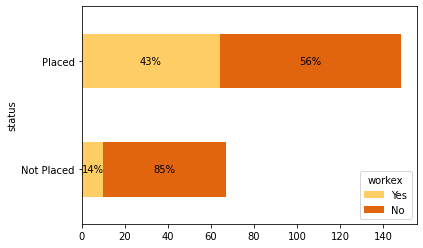

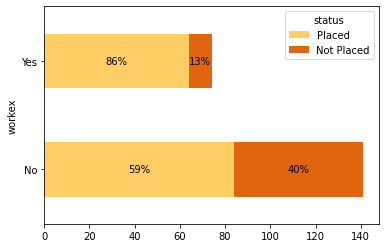

In [30]:
colors = sns.color_palette("YlOrBr", n_colors=len(df['status'].values))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

df.plot(x = 'status',kind='barh', stacked=True, mark_right = True, colormap = cmap1)
df_total = df["Yes"] + df["No"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(int(pc)) + '%', 
                 va = 'center', ha = 'center')
        
colors = sns.color_palette("YlOrBr", n_colors=len(df1['workex'].values))
cmap2 = LinearSegmentedColormap.from_list("my_colormap", colors)
        
df1.plot(x = 'workex',kind='barh', stacked=True, mark_right = True, colormap = cmap2)
df_total = df1["Placed"] + df1["Not Placed"]
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(int(pc)) + '%', 
                 va = 'center', ha = 'center')

The overall result that we take from here is, 
> If a student has work experience then, he's **most** likely to get placed. But, Only work experience cannot gaurentee the job.

### workex(Work Experience) with etest_p(Entrance Test Percentage)
- Aggregation

Mean
workex
No     71.556170
Yes    73.137838
Name: etest_p, dtype: float64
 
Max
workex
No     98.0
Yes    97.0
Name: etest_p, dtype: float64
 
Min
workex
No     50.00
Yes    50.48
Name: etest_p, dtype: float64


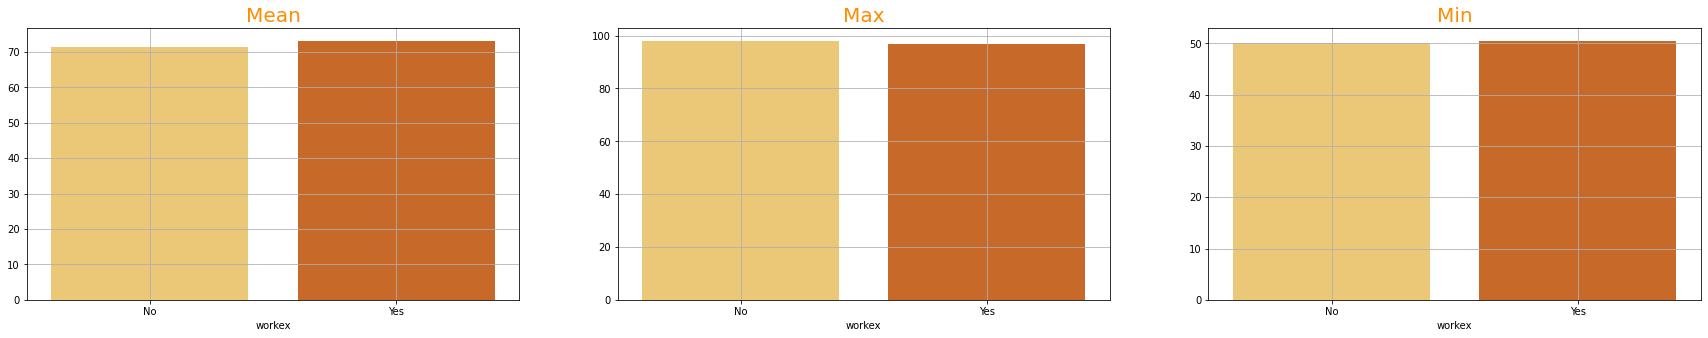

In [31]:
print('Mean')
print(data.groupby("workex", sort=True)["etest_p"].mean())
print(' ')
print('Max')
print(data.groupby("workex", sort=True)["etest_p"].max())
print(' ')
print('Min')
print(data.groupby("workex", sort=True)["etest_p"].min())

fig = plt.figure(figsize=(30,5))

ax = fig.add_subplot(1,3,1)
sns.barplot(x = data.groupby("workex", sort=True)["etest_p"].mean().index, y = data.groupby("workex", sort=True)["etest_p"].mean().values, palette='YlOrBr')
ax.set_title('Mean', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,2)
sns.barplot(x = data.groupby("workex", sort=True)["etest_p"].mean().index, y = data.groupby("workex", sort=True)["etest_p"].max().values, palette='YlOrBr')
ax.set_title('Max', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,3)
sns.barplot(x = data.groupby("workex", sort=True)["etest_p"].mean().index, y = data.groupby("workex", sort=True)["etest_p"].min().values, palette='YlOrBr')
ax.set_title('Min', color = 'darkorange', fontsize = 20)
plt.grid()

plt.show()

Every bar in each graph are more or less in the same level. So, drawing a defined result is not possible here.

### workex(Work Experience) with etest_p(Entrance Test Percentage)
- Distplot

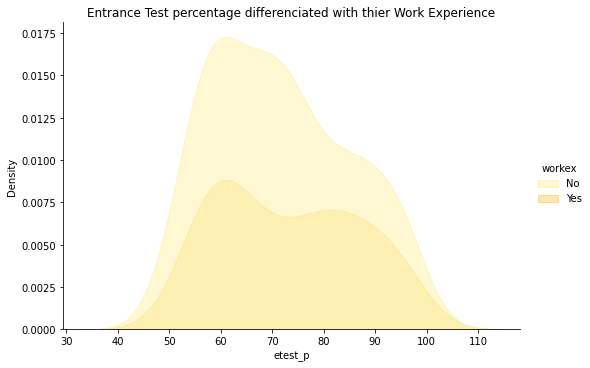

In [32]:
sns.displot(data=data, x='etest_p', hue='workex', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:2], height=5, aspect=1.5, alpha = 0.6).set(title = 'Entrance Test percentage differenciated with thier Work Experience')

Both plots shows the same pattern with each other and also with original distribution, which is of no use.
- There are still groups(double peaks) hiding behind the graph

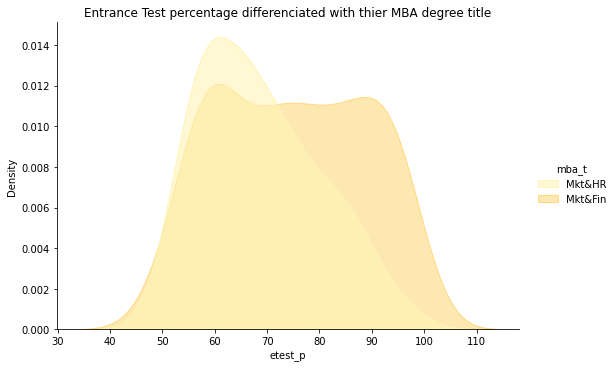

In [33]:
sns.displot(data=data, x='etest_p', hue='mba_t', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:2], height=5, aspect=1.5, alpha = 0.6).set(title = 'Entrance Test percentage differenciated with thier MBA degree title')

However, it is discovered that the ```etest_p(Entrance test percentage)``` are well explained with ```mba_t(MBA Title)```
> - Students with **considerably low scores in entrance tests are more likely to take Mkt&HR in their MBA.**      

- With respect to Mkt&Fin, the graph seems to have a flat peak, meaning, students choose Mkt&Fin in MBA despite the scores that they have scored in entrance test.
    - There might be some more groups hiding behind. So, Let's check their dependence with other variables

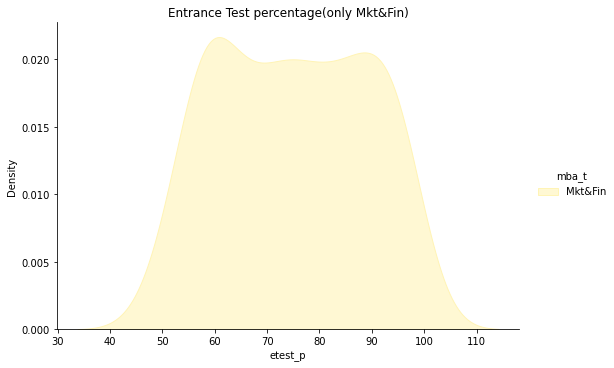

In [34]:
df = data[data['mba_t'] == 'Mkt&Fin']
sns.displot(data=df, x='etest_p', hue='mba_t', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:1], height=5, aspect=1.5, alpha = 0.6).set(title = 'Entrance Test percentage(only Mkt&Fin)')

We have now taken the graph only with Mkt&Fin of mba_t. Let's explore this graph seperately.

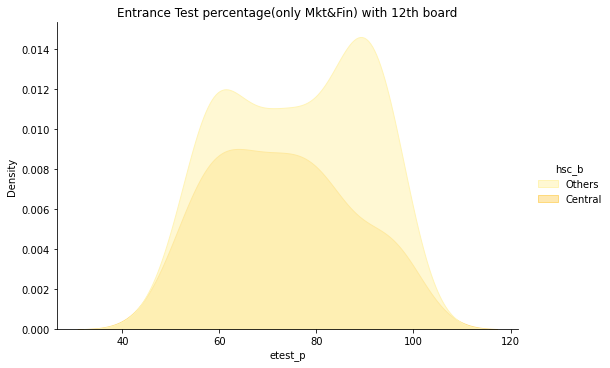

In [35]:
df = data[data['mba_t'] == 'Mkt&Fin']
sns.displot(data=df, x='etest_p', hue='hsc_b', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:2], height=5, aspect=1.5, alpha = 0.6).set(title = 'Entrance Test percentage(only Mkt&Fin) with 12th board')

After lot more trials it is known that, the parameter,**```hsc_b(12th board)``` well explains the entrance test scores of the students who take Mkt&Fin as their major in MBA**.
- Yet, drawing defined results are difficult here.

### workex(Work Experience) with etest_p(Entrance Test Percentage)
- Boxplot

Text(0.5, 1.0, 'Boxplot for etest_p vs workex')

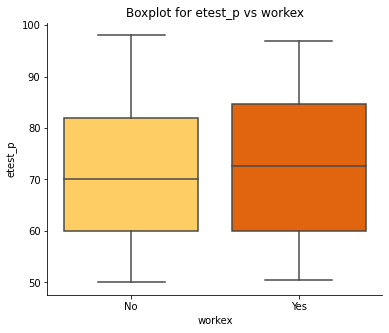

In [36]:
fig, ax = plt.subplots(figsize = (6,5))
sns.boxplot(x = data['workex'],y = data['etest_p'], palette='YlOrBr', saturation=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplot for etest_p vs workex')

### mba_p(MBA percentage) and mba_t(MBA title)
- Aggregation

Mean
mba_t
Mkt&Fin    62.825667
Mkt&HR     61.586632
Name: mba_p, dtype: float64
 
Max
mba_t
Mkt&Fin    77.89
Mkt&HR     76.26
Name: mba_p, dtype: float64
 
Min
mba_t
Mkt&Fin    51.21
Mkt&HR     52.38
Name: mba_p, dtype: float64


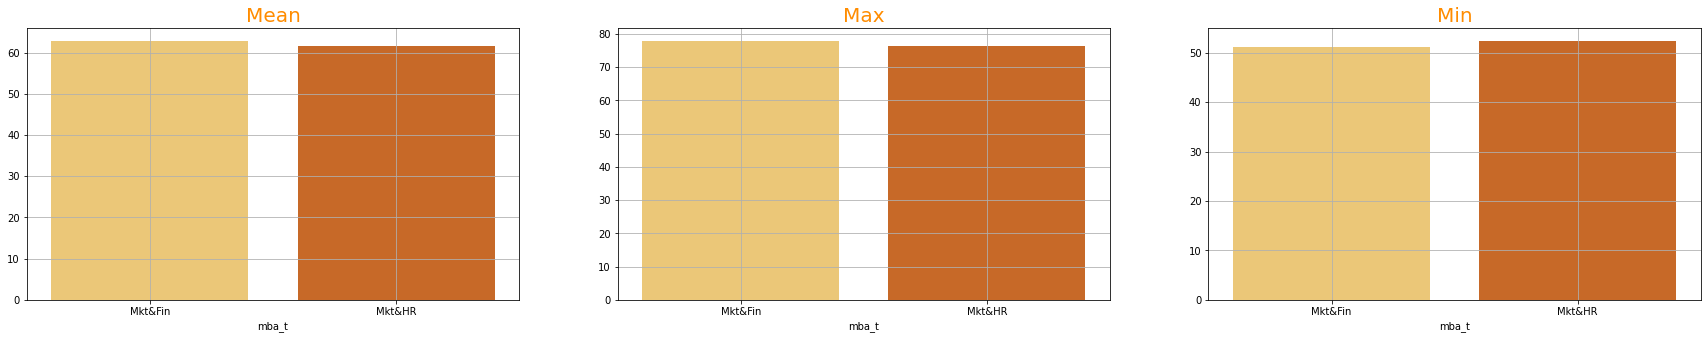

In [37]:
print('Mean')
print(data.groupby("mba_t", sort=True)["mba_p"].mean())
print(' ')
print('Max')
print(data.groupby("mba_t", sort=True)["mba_p"].max())
print(' ')
print('Min')
print(data.groupby("mba_t", sort=True)["mba_p"].min())

fig = plt.figure(figsize=(30,5))

ax = fig.add_subplot(1,3,1)
sns.barplot(x = data.groupby("mba_t", sort=True)["mba_p"].mean().index, y = data.groupby("mba_t", sort=True)["mba_p"].mean().values, palette='YlOrBr')
ax.set_title('Mean', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,2)
sns.barplot(x = data.groupby("mba_t", sort=True)["mba_p"].mean().index, y = data.groupby("mba_t", sort=True)["mba_p"].max().values, palette='YlOrBr')
ax.set_title('Max', color = 'darkorange', fontsize = 20)
plt.grid()

ax = fig.add_subplot(1,3,3)
sns.barplot(x = data.groupby("mba_t", sort=True)["mba_p"].mean().index, y = data.groupby("mba_t", sort=True)["mba_p"].min().values, palette='YlOrBr')
ax.set_title('Min', color = 'darkorange', fontsize = 20)
plt.grid()

plt.show()

Every bar in each graph are more or less in the same level. So, drawing a defined result is not possible here.

### mba_p(MBA percentage) and mba_t(MBA title)
- Distplot

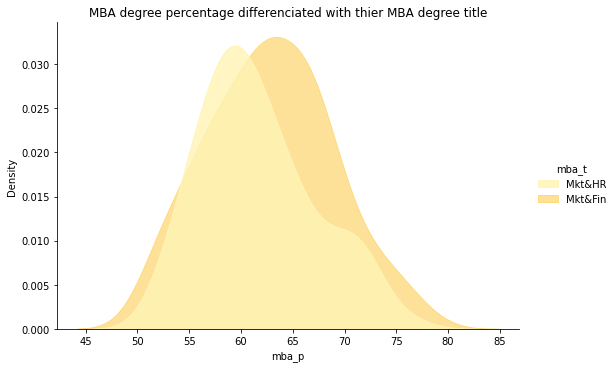

In [38]:
sns.displot(data=data, x='mba_p', hue='mba_t', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:2], height=5, aspect=1.5, alpha = 0.8).set(title = 'MBA degree percentage differenciated with thier MBA degree title')

Comparing Both the graphs, Either of two results can be concluded,
- Students studying **Mkt&Fin** are **intelligent** than the students who are studying in Mkt&HR.
- The **subject Mkt&Fin is easier than Mkt&HR.**      

Marketing and HR:
- We see a small bump after the peak. It might be because of some groups associated with them.
    - *Let's check them*

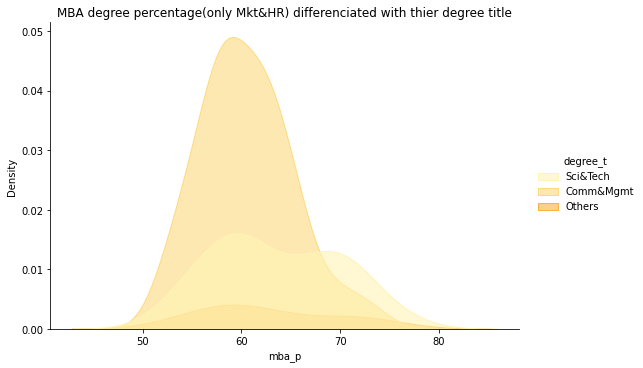

In [39]:
df = data[data['mba_t'] == 'Mkt&HR']
sns.displot(data=df, x='mba_p', hue='degree_t', kind='kde', fill=True, palette=sns.color_palette('YlOrBr')[:3], height=5, aspect=1.5, alpha = 0.6).set(title = 'MBA degree percentage(only Mkt&HR) differenciated with thier degree title')

> The students who took **Comm&Mgmt** as their major in undergraduate, and took **Mkt&HR** as their major in MBA are **scoring average in MBA degree**.     

Whereas, Sci&Tech students who took Mkt&HR, are spread equally over the number line.

### mba_p(MBA percentage) and mba_t(MBA title)
- Boxplot

Text(0.5, 1.0, 'Boxplot for mba_p vs mba_t')

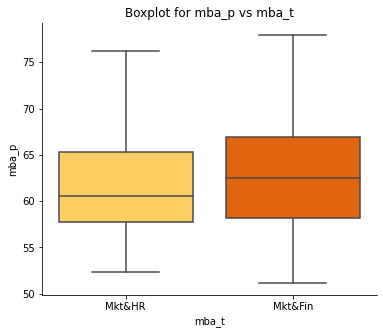

In [40]:
fig, ax = plt.subplots(figsize = (6,5))
sns.boxplot(x = data['mba_t'],y = data['mba_p'], palette='YlOrBr', saturation=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Boxplot for mba_p vs mba_t')